In [4]:
import os 
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import cv2
from PIL import Image

from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import LinearSVC

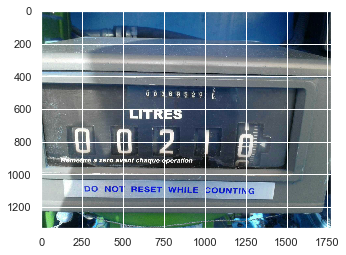

In [5]:
data_path = os.getcwd() + str('\\Dataset\\')
img = cv2.imread(data_path + str('\\HQ_analog\\0c5b6ae37471ed064c7ce6c21e5b4efd6b3b724a.jpg'))
plt.imshow(img)

In [6]:
dataset = datasets.fetch_openml('mnist_784', version=1, cache=True)

In [7]:
features = np.array(dataset.data, 'int16') 
labels = np.array(dataset.target, 'int')

list_hog_fd = []

for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

In [8]:
clf = LinearSVC()
clf.fit(hog_features, labels)
joblib.dump(clf, "digits_cls.pkl", compress=3)

['digits_cls.pkl']

In [9]:
grayImage = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage)

NameError: name 'im' is not defined

-1

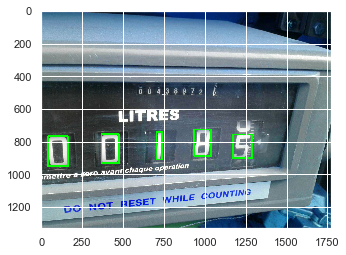

In [10]:
# Read the input image 
#im = cv2.imread(data_path + str('\\HQ_analog\\0c5b6ae37471ed064c7ce6c21e5b4efd6b3b724a.jpg'))
im = cv2.imread(data_path + str('\\HQ_analog\\0c20a9234948401c474c566d92d84b5fcba2edc8.jpg'))
#im = cv2.imread(data_path + str('\\HQ_analog\\15a08592d9615953288fa379a61050f4068ae7f8.jpg'))

# Convert to grayscale and apply Gaussian filtering
grayImage = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#thresh, im_gray = cv2.threshold(grayImage, 150, 255, cv2.THRESH_BINARY)
#im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

(thresh, im_th) = cv2.threshold(grayImage, 150, 255, cv2.THRESH_BINARY)

plt.imshow(im_th)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
#rects = [cv2.boundingRect(ctr) for ctr in ctrs]
rects = []

for ctr in ctrs:
    (x, y, w, h) = cv2.boundingRect(ctr)
    if (w >= 20 and w <= 200) and (h >= 100 and h <= 250): 
        rects.append(cv2.boundingRect(ctr))
        
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 10) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1 + leng, pt2:pt2 + leng]

plt.imshow(im)
cv2.waitKey()


-1

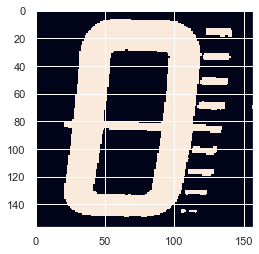

In [20]:
# Load the classifier
clf = joblib.load("digits_cls.pkl")

# Read the input image 
im = cv2.imread(data_path + str('\\HQ_analog\\0c5b6ae37471ed064c7ce6c21e5b4efd6b3b724a.jpg'))
#im = cv2.imread(data_path + str('\\HQ_analog\\0c20a9234948401c474c566d92d84b5fcba2edc8.jpg'))
#im = cv2.imread(data_path + str('\\HQ_analog\\15a08592d9615953288fa379a61050f4068ae7f8.jpg'))
#im = cv2.imread(data_path + str('\\HQ_analog\\0219dd3cb0c76d33a53bb1f4585565adef4a13f8.jpg'))

# Convert to grayscale and apply Gaussian filtering
grayImage = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#thresh, im_gray = cv2.threshold(grayImage, 150, 255, cv2.THRESH_BINARY)
#im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

(thresh, im_th) = cv2.threshold(grayImage, 150, 255, cv2.THRESH_BINARY)

# Threshold the image
#ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
#rects = [cv2.boundingRect(ctr) for ctr in ctrs]
rects = []
test = []
digits = []

for ctr in ctrs:
    (x, y, w, h) = cv2.boundingRect(ctr)
    if (w >= 10 and w <= 300) and (h >= 100 and h <= 500):  
        rects.append(cv2.boundingRect(ctr))
        
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 10) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.1)
    larg = int(rect[3] * 1.1)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1 + leng, pt2:pt2 + leng]
    test.append(roi)
    
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 3, (0, 255, 255), 5)
    digits.append(nbr)
    
#print(test[1])
plt.imshow(test[0])
#plt.imshow(im)
cv2.waitKey()